<a href="https://colab.research.google.com/github/Gourav629/MCA-Minor-/blob/master/TryNew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Installation**

In [ ]:
!pip install -q kaggle

## **Kaggle Setup**

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gouravsingh123","key":"444bce40f8e2dc8e1ea797278738fc18"}'}

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                                 title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedrcat/daigt-v2-train-dataset                                     DAIGT V2 Train Dataset                           29MB  2023-11-16 01:38:36           1863        181  1.0              
muhammadbinimran/housing-price-prediction-data                      Housing Price Prediction Data                   763KB  2023-11-21 17:56:32           8346        148  1.0              
thedevastator/books-sales-and-ratings                               Books Sales and Ratings                          53KB  2023-12-06 04:54:33           1863         28  1.0              
thedrcat/daigt-proper-train-dataset                         

In [ ]:
!kaggle datasets download -d deltaechov/rnsamamographt512px8bit

100% 7.15G/7.17G [01:00<00:00, 153MB/s]
100% 7.17G/7.17G [01:01<00:00, 126MB/s]


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import os

## **Unzipping Dataset**

In [ ]:
!unzip rnsamamographt512px8bit.zip -d my_data

Streaming output truncated to the last 5000 lines.
  inflating: my_data/train_images_512px8bit/train_images/63617/159110654.png  
  inflating: my_data/train_images_512px8bit/train_images/63617/1855699072.png  
  inflating: my_data/train_images_512px8bit/train_images/63617/1917877119.png  
  inflating: my_data/train_images_512px8bit/train_images/63617/887426674.png  
  inflating: my_data/train_images_512px8bit/train_images/63623/1186739164.png  
  inflating: my_data/train_images_512px8bit/train_images/63623/1657034655.png  
  inflating: my_data/train_images_512px8bit/train_images/63623/335778602.png  
  inflating: my_data/train_images_512px8bit/train_images/63623/625719002.png  
  inflating: my_data/train_images_512px8bit/train_images/63626/1154699412.png  
  inflating: my_data/train_images_512px8bit/train_images/63626/549972940.png  
  inflating: my_data/train_images_512px8bit/train_images/63626/599167493.png  
  inflating: my_data/train_images_512px8bit/train_images/63626/939566995.pn

## **Dataframe Reading**

In [ ]:
df = pd.read_csv('my_data/train.csv')


In [ ]:
count = 0
for i in df['cancer']:
  if i == 1:
    count+=1
count

1158

## **Feature Engineering**

In [ ]:
data_new = df[['patient_id','image_id','cancer','invasive']].copy()
data_new

,patient_id,image_id,cancer,invasive
0,10006,462822612,0,0
1,10006,1459541791,0,0
2,10006,1864590858,0,0
3,10006,1874946579,0,0
4,10011,220375232,0,0
...,...,...,...,...
54701,9973,1729524723,0,0
54702,9989,63473691,0,0
54703,9989,1078943060,0,0
54704,9989,398038886,0,0


In [ ]:
def create_target(row):
    if row['cancer'] == 1 and row['invasive'] == 1:
        return 2
    elif row['cancer'] == 1 and row['invasive'] == 0:
        return 1
    else:
        return 0

data_new['target'] = data_new.apply(create_target,axis=1)
data_new

,patient_id,image_id,cancer,invasive,target
0,10006,462822612,0,0,0
1,10006,1459541791,0,0,0
2,10006,1864590858,0,0,0
3,10006,1874946579,0,0,0
4,10011,220375232,0,0,0
...,...,...,...,...,...
54701,9973,1729524723,0,0,0
54702,9989,63473691,0,0,0
54703,9989,1078943060,0,0,0
54704,9989,398038886,0,0,0


In [ ]:
class_count = data_new['target'].value_counts()
class_count

0    53548
2      818
1      340
Name: target, dtype: int64

In [ ]:
class_counts = data_new['target'].value_counts()

target_samples_per_class = 1000

balanced_data = []
for cls in class_counts.index:
    samples_needed = target_samples_per_class - class_counts[cls]
    if samples_needed <= 0:
        samples = data_new[data_new['target'] == cls].sample(target_samples_per_class)
    else:
        samples = pd.concat([data_new[data_new['target'] == cls]] * (samples_needed // class_counts[cls] + 1), axis=0, ignore_index=True)[:target_samples_per_class]
    balanced_data.append(samples)

balanced_data = pd.concat(balanced_data)

balanced_data.shape
balanced_data

,patient_id,image_id,cancer,invasive,target
19443,30570,388840344,0,0,0
30017,4205,278037409,0,0,0
34591,47107,1659558284,0,0,0
35849,48445,1344049175,0,0,0
10456,21276,619218016,0,0,0
...,...,...,...,...,...
675,865,2075900290,1,0,1
676,8732,647267886,1,0,1
677,8732,791267021,1,0,1
678,9851,1409270544,1,0,1


## **Directory Making**

In [ ]:
!mkdir image

In [ ]:
!mkdir image/effected

In [ ]:
!mkdir image/less_effected

In [ ]:
!mkdir image/healthy

**Directory Organizing**

In [ ]:
import shutil

img_width, img_height = 224, 224
batch_size = 10

X = []
y = balanced_data['target']
dataset_dir = './my_data'
new = './image'

for _, row in balanced_data.iterrows():
    patient_id = row['patient_id']
    image_id = row['image_id']
    tg = row['target']
    image_path = os.path.join(dataset_dir, 'train_images_512px8bit', 'train_images', str(patient_id), f'{image_id}.png')
    """
    if image_path exists then check
    0 : healthy
    1 : cancer effected but not invasive
    2 : cancer and invasive effected
    """
    if os.path.exists(image_path):
      print(image_path)
      if tg == 0:
        shutil.copyfile(image_path, './image/healthy/'+str(image_id)+'.png')
      if tg == 1:
        shutil.copyfile(image_path, './image/less_effected/'+str(image_id)+'.png')
      if tg == 2:
        shutil.copyfile(image_path, './image/effected/'+str(image_id)+'.png')

IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3

dataset_image = tf.keras.preprocessing.image_dataset_from_directory(
"./image",
shuffle=True,
image_size = (IMAGE_SIZE, IMAGE_SIZE),
batch_size = BATCH_SIZE
)



./my_data/train_images_512px8bit/train_images/30570/388840344.png
./my_data/train_images_512px8bit/train_images/4205/278037409.png
./my_data/train_images_512px8bit/train_images/47107/1659558284.png
./my_data/train_images_512px8bit/train_images/48445/1344049175.png
./my_data/train_images_512px8bit/train_images/21276/619218016.png
./my_data/train_images_512px8bit/train_images/24212/364674561.png
./my_data/train_images_512px8bit/train_images/34737/181960636.png
./my_data/train_images_512px8bit/train_images/36204/138907096.png
./my_data/train_images_512px8bit/train_images/39368/474837196.png
./my_data/train_images_512px8bit/train_images/65077/116499061.png
./my_data/train_images_512px8bit/train_images/19393/1834649125.png
./my_data/train_images_512px8bit/train_images/30452/2018386611.png
./my_data/train_images_512px8bit/train_images/47057/506624926.png
./my_data/train_images_512px8bit/train_images/43936/227921764.png
./my_data/train_images_512px8bit/train_images/46422/1829522480.png
./my_d

In [ ]:
data_n = tf.keras.preprocessing.image_dataset_from_directory(
"./image",
shuffle=True,
image_size = (224, 224),
batch_size = 3
)

Found 2158 files belonging to 3 classes.


In [ ]:
class_names = dataset_image.class_names
cl_n = data_n.class_names
print(cl_n)
class_names


['effected', 'healthy', 'less_effected']


['effected', 'healthy', 'less_effected']

In [ ]:
len(dataset_image)

68

In [ ]:
for image_batch, label_batch in dataset_image.take(1):

  print(image_batch.shape)
  print(label_batch.numpy())

(32, 256, 256, 3)
[0 1 1 0 0 0 0 1 2 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 2 0 1 1 1 0 0 0]


## **Image Presentation**

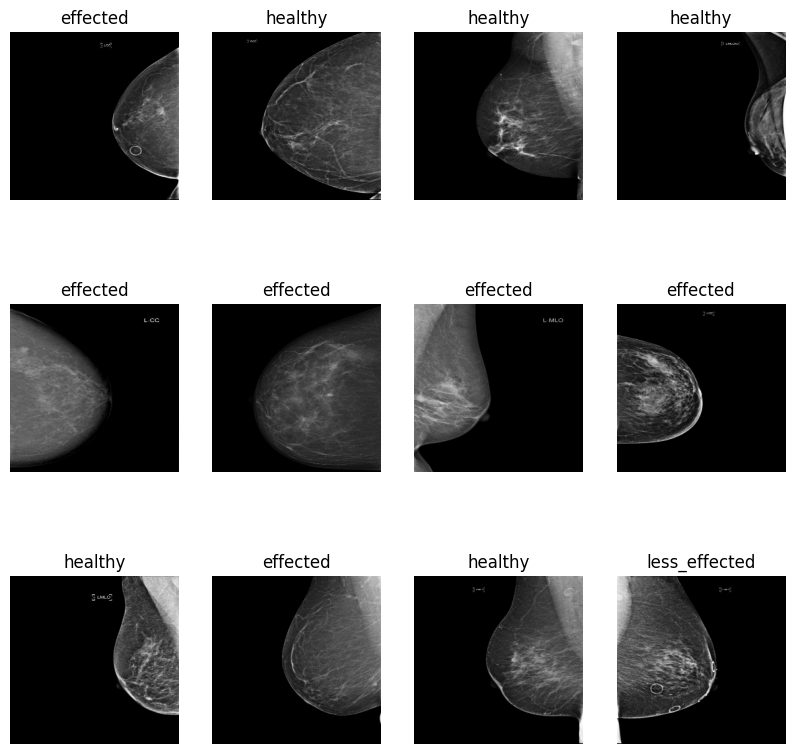

In [ ]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset_image.take(1):
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.axis("off")
    plt.title(class_names[label_batch[i]])


In [ ]:
train_size = 0.8
len(dataset_image)*train_size

54.400000000000006

In [ ]:
train_ds = dataset_image.take(54)
len(train_ds)

54

In [ ]:
test_ds =dataset_image.skip(54)
len(test_ds)

14

In [ ]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [ ]:
test_ds = test_ds.skip(6)
len(test_ds)

8

## **Dataset Partitioning Method**

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1,test_split=0.1, shuffle=True, shuffle_size =10000):
  """ This is a function to Split Train Test Validate data from Dataset """
  ds_size = len(ds)
  if shuffle:
    ds = ds.shuffle(shuffle_size, seed=12)
  train_size = int(train_split * ds_size)
  val_size = int(val_split*ds_size)
  train_ds = ds.take(train_size)
  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)
  return train_ds, val_ds, test_ds
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset_image)
tr_ds,vl_ds,tst_ds = get_dataset_partitions_tf(data_n)
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

54
6
8


## **Autotuning & Data Augmentation**

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

#data_n
tr_ds = tr_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
vl_ds = vl_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
tst_ds = tst_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

## **CNN with 6 layers**

In [ ]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,


    # layer1
    layers.Conv2D(512,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    #layer2
    layers.Conv2D(256,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    #layer3
    layers.Conv2D(256,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    #layer4
    layers.Conv2D(256,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    #layer5
    layers.Conv2D(256,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    #layer6
    layers.Conv2D(512,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dropout(0.3),
    layers.Dense(512,activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 512)       14336     
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 512)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 256)       1179904   
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 256)         0         
 g2D)                                                 

## **Compilation & Testing**

In [ ]:
model.compile(optimizer='adam',
             loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['accuracy']
             )


history = model.fit(train_ds,
                    epochs=100,
                    batch_size=BATCH_SIZE,
                    verbose = 1,
                    validation_data=val_ds
                    )


Epoch 1/100
54/54 [==============================] - 86s 874ms/step - loss: 1.0440 - accuracy: 0.4392 - val_loss: 1.0352 - val_accuracy: 0.4323
Epoch 2/100
54/54 [==============================] - 35s 647ms/step - loss: 1.0215 - accuracy: 0.4624 - val_loss: 1.0322 - val_accuracy: 0.4323
Epoch 3/100
54/54 [==============================] - 36s 666ms/step - loss: 1.0199 - accuracy: 0.4624 - val_loss: 1.0322 - val_accuracy: 0.4323
Epoch 4/100
54/54 [==============================] - 36s 661ms/step - loss: 1.0197 - accuracy: 0.4601 - val_loss: 1.0503 - val_accuracy: 0.4323
Epoch 5/100
54/54 [==============================] - 36s 662ms/step - loss: 1.0220 - accuracy: 0.4624 - val_loss: 1.0337 - val_accuracy: 0.4323
Epoch 6/100
54/54 [==============================] - 36s 658ms/step - loss: 1.0198 - accuracy: 0.4624 - val_loss: 1.0323 - val_accuracy: 0.4323
Epoch 7/100
54/54 [==============================] - 36s 660ms/step - loss: 1.0190 - accuracy: 0.4624 - val_loss: 1.0385 - val_accuracy:

KeyboardInterrupt: ignored

## **Plotting History**

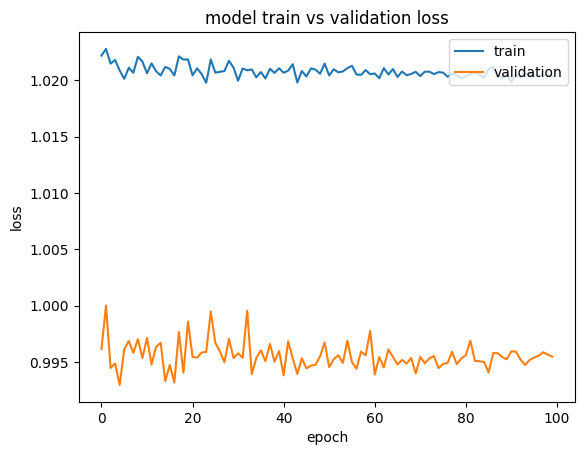

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

**Prediction**

## **Custom ResNet-18 Method**

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Model

def build_resnet18(input_shape=(224, 224, 3), num_classes=1000):
    # Input layer
    input_tensor = layers.Input(shape=input_shape)

    # Initial convolution
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same')(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Residual blocks
    x = residual_block(x, filters=[64, 64], strides=(1, 1), block_name='block1')
    x = residual_block(x, filters=[128, 128], strides=(2, 2), block_name='block2')
    x = residual_block(x, filters=[256, 256], strides=(2, 2), block_name='block3')
    x = residual_block(x, filters=[512, 512], strides=(2, 2), block_name='block4')

    # Global average pooling
    x = layers.GlobalAveragePooling2D()(x)

    x = layers.Dropout(0.3)(x)
    # Fully connected layer
    x = layers.Dense(num_classes, activation='softmax')(x)

    # Model
    model = Model(inputs=input_tensor, outputs=x, name='resnet18')

    return model

def residual_block(x, filters, strides=(1, 1), block_name='block'):
    # Shortcut connection
    shortcut = x

    # First convolution
    x = layers.Conv2D(filters[0], (3, 3), strides=strides, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    # Second convolution
    x = layers.Conv2D(filters[1], (3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)

    # Shortcut connection (if needed)
    if strides != (1, 1) or shortcut.shape[-1] != filters[1]:
        shortcut = layers.Conv2D(filters[1], (1, 1), strides=strides, padding='valid')(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    # Final addition
    x = layers.add([x, shortcut])
    x = layers.Activation('relu')(x)

    return x

# Build the ResNet-18 model
resnet18_model = build_resnet18()

# Display model summary
resnet18_model.summary()

Model: "resnet18"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 112, 112, 64)         9472      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 112, 112, 64)         256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 112, 112, 64)         0         ['batch_normalization[0

**Compilation & Testing**

In [ ]:
resnet18_model.compile(optimizer='adam',
             loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['accuracy']
             )


history = resnet18_model.fit(tr_ds,
                    epochs=50,
                    batch_size=BATCH_SIZE,
                    verbose = 1,
                    validation_data=vl_ds
                    )

Epoch 1/50
576/576 [==============================] - 25s 26ms/step - loss: 0.0512 - accuracy: 0.9820 - val_loss: 1.5503 - val_accuracy: 0.7546
Epoch 2/50
576/576 [==============================] - 9s 16ms/step - loss: 0.0392 - accuracy: 0.9884 - val_loss: 1.1895 - val_accuracy: 0.7269
Epoch 3/50
576/576 [==============================] - 9s 16ms/step - loss: 0.0450 - accuracy: 0.9867 - val_loss: 1.6642 - val_accuracy: 0.7222
Epoch 4/50
576/576 [==============================] - 8s 15ms/step - loss: 0.0812 - accuracy: 0.9705 - val_loss: 1.4205 - val_accuracy: 0.7407
Epoch 5/50
576/576 [==============================] - 10s 17ms/step - loss: 0.0150 - accuracy: 0.9965 - val_loss: 1.5424 - val_accuracy: 0.7778
Epoch 6/50
576/576 [==============================] - 9s 15ms/step - loss: 0.0103 - accuracy: 0.9977 - val_loss: 1.1989 - val_accuracy: 0.8009
Epoch 7/50
576/576 [==============================] - 9s 15ms/step - loss: 0.0531 - accuracy: 0.9803 - val_loss: 1.3594 - val_accuracy: 0.76

## **Plotting Graph**

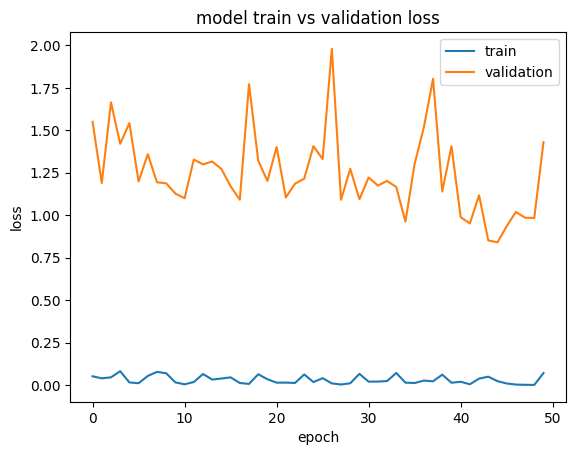

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

## **Prediction**

1/1 [==============================] - 0s 19ms/step


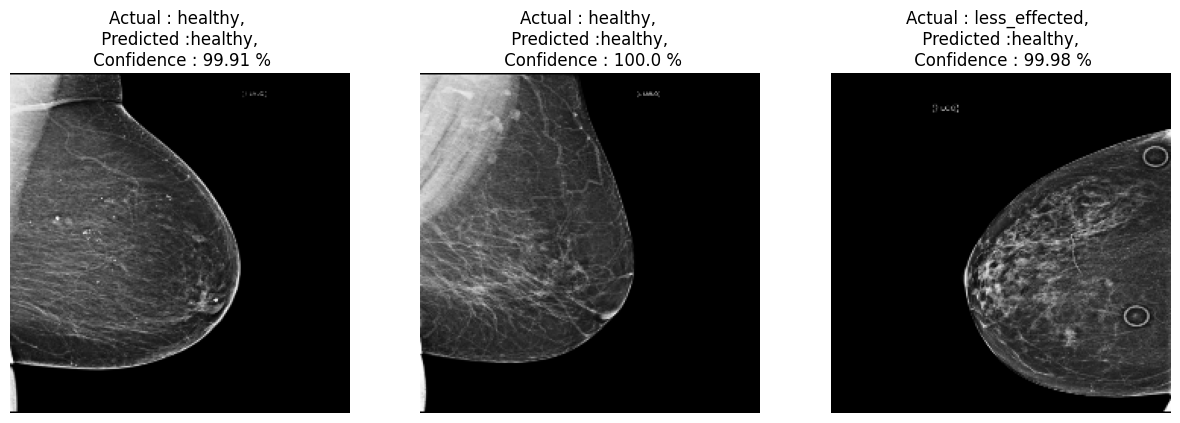

In [ ]:
def predict_image(model,img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array = tf.expand_dims(img_array, 0)
  predictions = model.predict(img_array)
  predicted_class = class_names[np.argmax(predictions[0])]
  confidence = round(100*(np.max(predictions[0])), 2)
  return predicted_class, confidence

plt.figure(figsize=(15,15))
for images, labels in tst_ds.take(1):
  for i in range(3):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    predicted_class, confidence = predict_image(resnet18_model,images[i].numpy())
    actual_class = class_names[labels[i]]
    plt.title(f"Actual : {actual_class}, \n Predicted :{predicted_class}, \n Confidence : {confidence} %")
    plt.axis("off")

## Model Saving

In [ ]:
resnet18_model.save(f"./Resnet_Custom.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
